In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) & default libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To make the plots appear inside the notebook:
%matplotlib inline

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, fl_score
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'fl_score' from 'sklearn.metrics' (/Users/timmycho/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/__init__.py)

In [4]:
# Read and load data
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
# Get the number of rows and columns in the CSV file
df.shape

In [ ]:
# Exploratory Data Analysis (EDA) - explore the data and be familiar with it.

# View the first 5 columns of the data
df.head()

In [ ]:
# View the last 5 columns of the data
df.tail()

In [ ]:
df["sex"].value_counts()
df["thalach"].value_counts()

In [ ]:
# The data can be visualized too, using .plot
df["sex"].value_counts().plot(kind="bar", color=["purple","pink"])

In [ ]:
df.chol.value_counts()

In [ ]:
pd.crosstab(df.age,df.thalach)

In [ ]:
pd.crosstab(df.chol,df.sex)

In [ ]:
# Compare target column with sex column
pd.crosstab(df.target,df.sex)

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar", 
                                   figsize=(12,8),
                                   color=["lime","orange"])

In [ ]:
pd.crosstab(df.chol,df.target).plot(kind="hist",
                                    figsize=(350,175),
                                    color=["salmon","skyblue"])

In [ ]:
plt.scatter(df.age,df.thalach, color="brown")

In [ ]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar", 
                                   figsize=(12,8),
                                   color=["lime","orange"])

# Making the result understandable by changing labels
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);
plt.xticks(rotation=0)

In [ ]:
# Do triple hashtags to make a heading 

In [ ]:
### Age vs. Max Heart Rate for Heart Disease

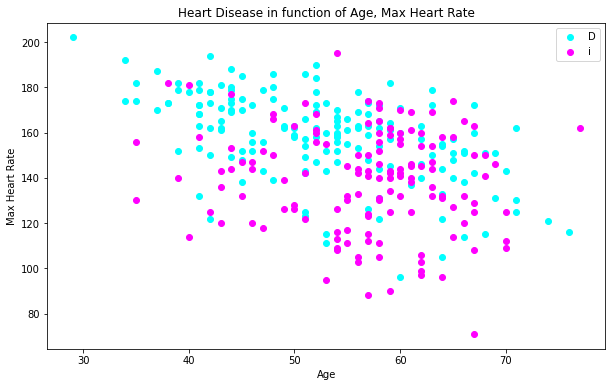

In [5]:
# Combining multiple variables

# 1. Create another figure
plt.figure(figsize=(10,6))

# Scatterplot with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="cyan")

# Scatterplot with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="magenta")

plt.title("Heart Disease in function of Age, Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend("Disease, No Disease")

In [3]:
# Check distribution of age via histogram
df.age.plot.hist();

NameError: name 'df' is not defined

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

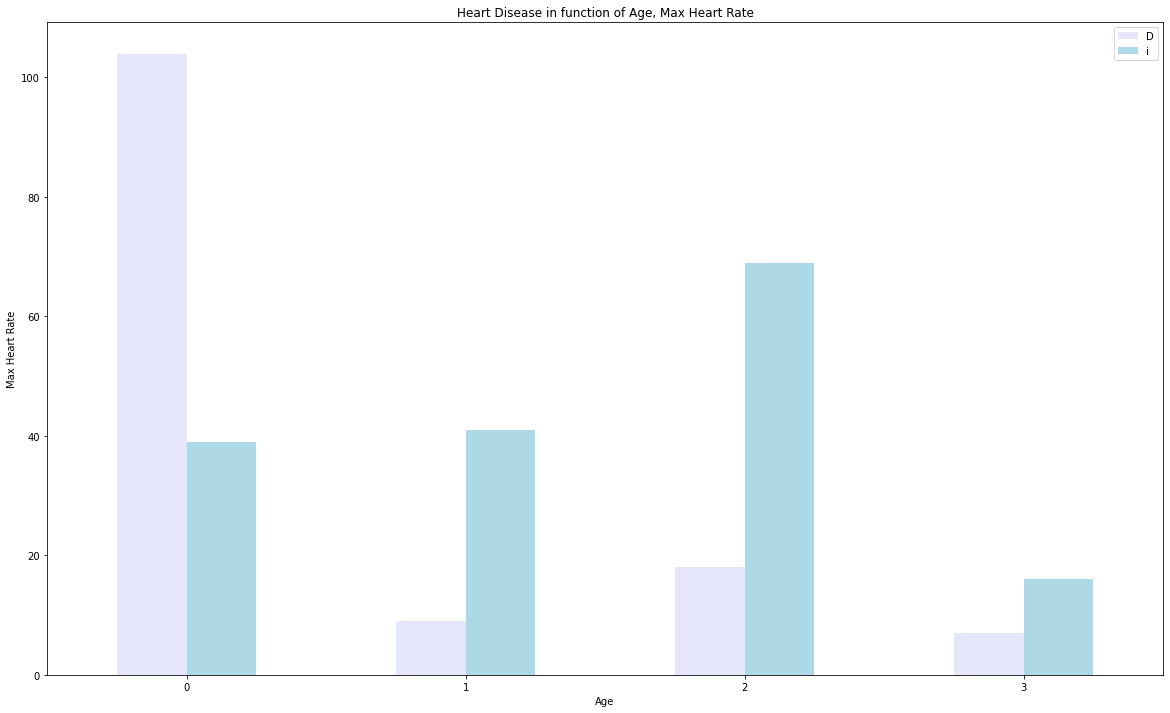

In [6]:
pd.crosstab(df.cp,df.target)

# Make crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(20,12),
                                  color=["lavender", "lightblue"])

# Adding some context
plt.title("Heart Disease in function of Age, Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend("Disease, No Disease")
plt.xticks(rotation=0)

In [ ]:
# Get overview of data
df.head()

In [7]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.35, -0.35)

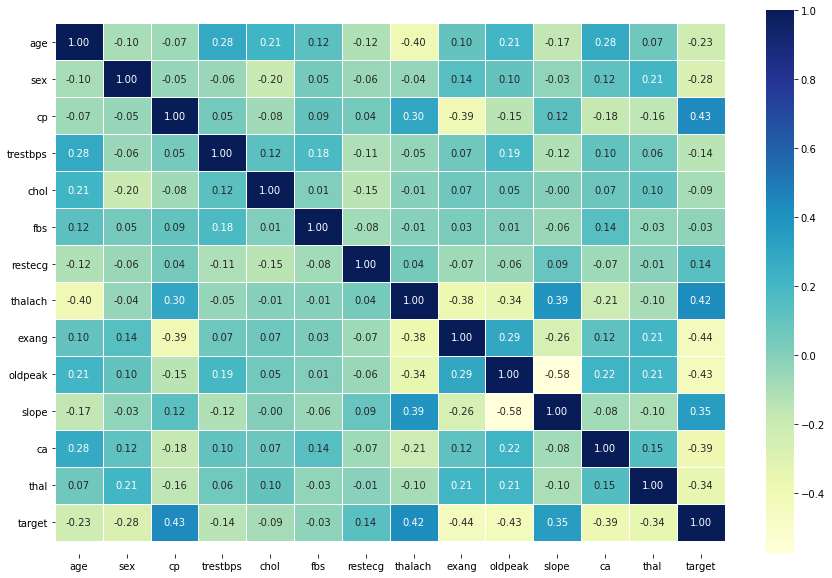

In [8]:
# Visualize the correlation matrix via seaborn
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corrMatrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.35, top - 0.35)

In [ ]:
### MODELING

In [ ]:
df.head()

In [9]:
# SPLIT data into X and Y
X = df.drop("target",axis=1)
Y = df["target"]

In [10]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [11]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
# Split data into TESTING and TRAINING sets
np.random.seed(42)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size=0.2)

In [13]:
X_Train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [14]:
Y_Train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [15]:
X_Test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [16]:
Y_Test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [17]:
Y_Train, len(Y_Train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

In [31]:
# First: Place models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit & score models
def Fit_and_Score(models, X_Train, X_Test, Y_Train, Y_Test):
    # Set random seed
    np.random.seed(42)
    # Create dictionary to keep model scores
    model_Scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit model to data
        model.fit(X_Train, Y_Train)
        # Evaluate model & append its score to modelScores
        model_Scores[name] = model.score(X_Test, Y_Test)
    return model_Scores

In [32]:
model_Scores = Fit_and_Score(models=models,
                            X_Train=X_Train,
                            X_Test=X_Test,
                            Y_Train=Y_Train,
                            Y_Test=Y_Test)

model_Scores

/Users/timmycho/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

In [33]:
### Model Comparison

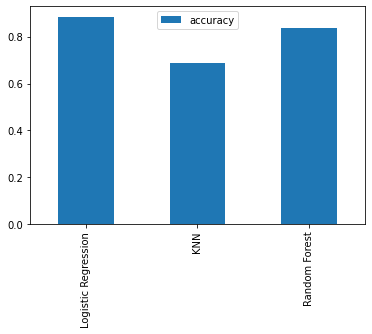

In [37]:
compare_Models = pd.DataFrame(model_Scores, index=["accuracy"])
compare_Models.T.plot.bar();
# Based on this comparison, Linear Regression is the best method because it has the highest accuracy of the 3 methods.

In [39]:
### Hypyterparameter Tuning & KNN

In [40]:
# Create training and test sets
trainScores = []
testScores = []

# Create list of different values for N_neighbors
neighbors = range(1,21)

# Set up KNN instance
KNN = KNeighborsClassifier()

# Loop through different N_neighbors
for i in neighbors:
    KNN.set_params(n_neighbors=i)
    
    # Fit the algorithm
    KNN.fit(X_Train, Y_Train)
    
    # Update training & test scores list
    trainScores.append(KNN.score(X_Train,Y_Train))
    testScores.append(KNN.score(X_Test,Y_Test))

In [41]:
trainScores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [42]:
testScores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.4%


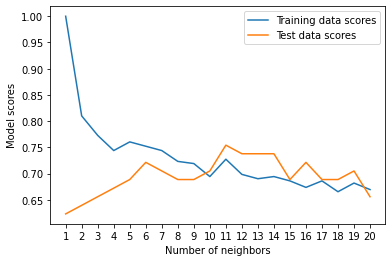

In [47]:
plt.plot(neighbors, trainScores, label="Training data scores")
plt.plot(neighbors, testScores, label="Test data scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model scores")
plt.legend()

print(f"Maximum KNN score on the test data: {max(testScores)*100:.1f}%")